# House Prices

Project ownership : Vincent Boettcher's notebook.

Goal : Predict the sales price for each house in Ames, Iowa. For each Id in the test set, you must predict the value of the SalePrice variable.

Metric : Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Dataframe details

This dataframe uses US metrics such as square feet.

For understanding purposes outside of the US, these metrics will be converted to the metric system using the following tables:

Square feet = 1
Square meters = 0.09290304

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Imports de scikit-learn
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, OrdinalEncoder

# Imports spécifiques pour les pipelines
from sklearn import pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

## Data analysis

### Size, shape, quantity and type of data

In [3]:
# Importing training data
dataset_origin = pd.read_csv("Data/train.csv")
dataset_origin.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
# Copying the original dataframe to keep a copy untouched
dataset = dataset_origin.copy()

In [5]:
# Looking at the shape of the dataframe
print(f"Shape of the dataframe: \n {dataset.shape}\n")
print(f"Column names: \n {dataset.columns}\n")

Shape of the dataframe: 
 (1460, 81)

Column names: 
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'Garag

In [6]:
dataset.set_index('Id', inplace = True)

In [7]:
print(f"Column names, Non-Null Count and type of data: \n {dataset.info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Total of columns : 81
Total of rows : 1460
Total of data types : float64(3), int64(35), object(43)
Data quantity : more or less 115k

The dataframe seems to contain a lot of extremely detailed categories regarding various types of properties and amenities.

We will have to find which may have an impact on the sale prices of houses.

### What is in the column Sale Prices?

Let's have a look at the content of the column "SalePrice" to see how sale prices are distributed in our dataframe.

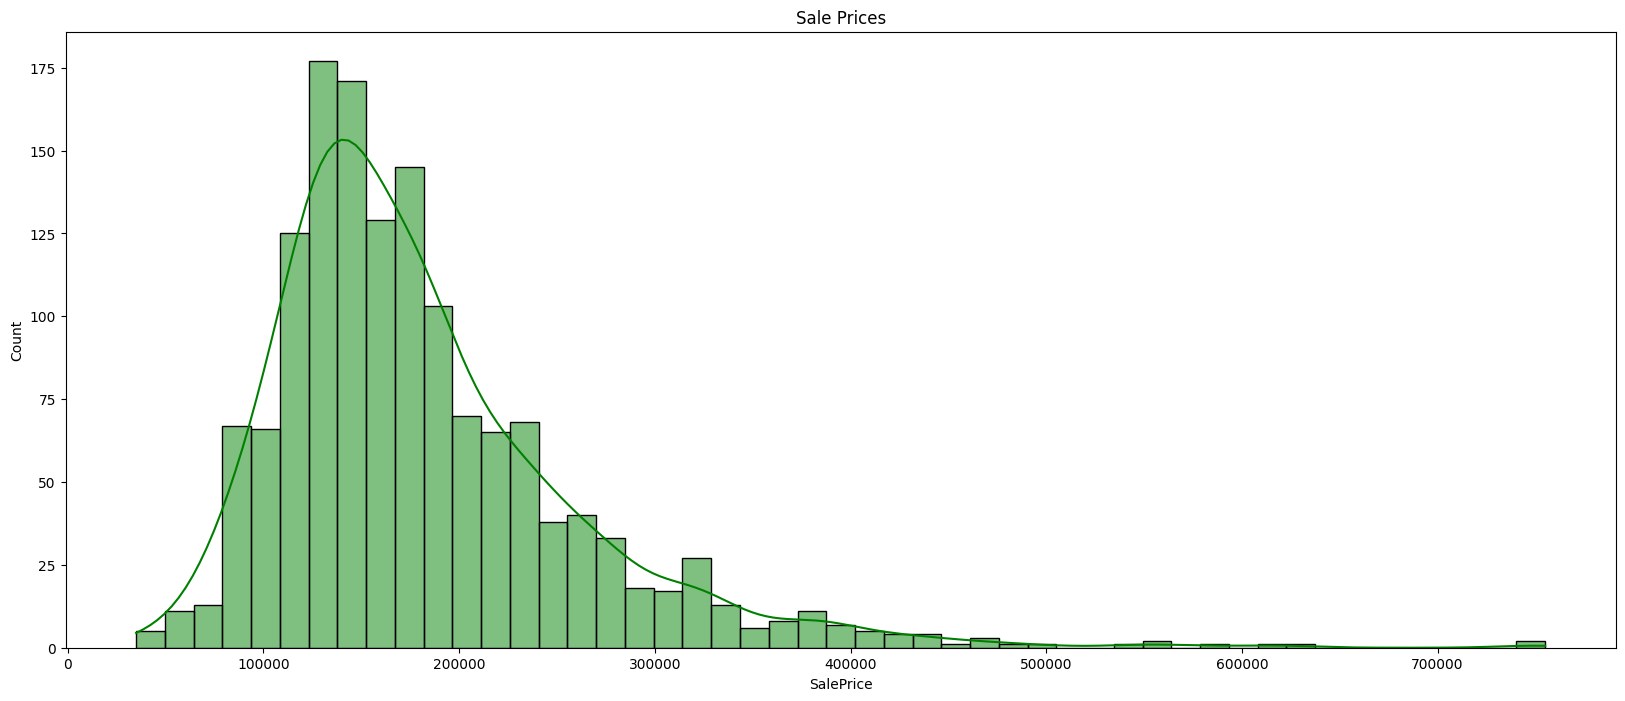

In [74]:
plt.figure(figsize = (20, 8))
plt.title("Sale Prices")
plt.show(sns.histplot(dataset["SalePrice"], legend=True, color = "green", kde=True))

The distribution is uneven and most of the data we have is for sale prices between $100000 and $200000.

### Dealing with missing values

Before going any further, we will check if there are missing values in this dataframe and we will deal with these missing values.

Now let's have a look at an example of column with null values.

In [8]:
dataset["Alley"]

Id
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
1456    NaN
1457    NaN
1458    NaN
1459    NaN
1460    NaN
Name: Alley, Length: 1460, dtype: object

Some columns seem to have null data. But when we look at the data description file given with the dataset, it seems that some data with the entry "NA" have been transformed to "NaN" in the dataframe. 

For example, in the data description file, the column "Alley" should have the following data : "NA" for "No alley access". Instead it was replaced by "NaN" for null.

We will have a look at these columns to make the appropriate modifications.

In [9]:
dataset_nan_values = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for columns in dataset_nan_values:
    dataset[columns].fillna("NA", inplace = True)
    
print(f"Non-Null Count Verification: \n {dataset.info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
dataset.loc[:, dataset.isnull().any()]

,LotFrontage,MasVnrType,MasVnrArea,Electrical,GarageYrBlt
Id,,,,,
1,65.0,BrkFace,196.0,SBrkr,2003.0
2,80.0,None,0.0,SBrkr,1976.0
3,68.0,BrkFace,162.0,SBrkr,2001.0
4,60.0,None,0.0,SBrkr,1998.0
5,84.0,BrkFace,350.0,SBrkr,2000.0
...,...,...,...,...,...
1456,62.0,None,0.0,SBrkr,1999.0
1457,85.0,Stone,119.0,SBrkr,1978.0
1458,66.0,None,0.0,SBrkr,1941.0


"NaN" values have been replaced with "NA" when it was relevant - using the data description file given at the start of the project.

We now have the following columns with some null values :

LotFrontage, MasVnrType, MasVnrArea, Electrical, GarageYrBlt

In [11]:
dataset.loc[dataset["LotFrontage"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
8,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
13,20,RL,NaN,12968,Pave,NA,IR2,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,144000
15,20,RL,NaN,10920,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,GdWo,NA,0,5,2008,WD,Normal,157000
17,20,RL,NaN,11241,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,NA,NA,Shed,700,3,2010,WD,Normal,149000
25,20,RL,NaN,8246,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,20,RL,NaN,12546,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,4,2007,WD,Normal,182900
1432,120,RL,NaN,4928,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,10,2009,WD,Normal,143750
1442,120,RM,NaN,4426,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2008,WD,Normal,149300


We will replace missing values in the column "LotFrontage" with most frequent data.

In [12]:
# Replacing "NaN" values in LotFrontage column with most frequent data
dataset["LotFrontage"] = dataset["LotFrontage"].fillna(
    dataset["LotFrontage"].value_counts().index[0])

# Verification
dataset.loc[dataset["LotFrontage"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [13]:
dataset.loc[dataset["MasVnrType"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
235,60,RL,60.0,7851,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2010,WD,Normal,216500
530,20,RL,60.0,32668,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,NA,NA,NA,0,3,2007,WD,Alloca,200624
651,60,FV,65.0,8125,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2008,WD,Normal,205950
937,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2009,WD,Normal,184900
974,20,FV,95.0,11639,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,12,2008,New,Partial,182000
978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,11,2007,New,Partial,199900
1244,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2006,New,Partial,465000
1279,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,3,2008,WD,Normal,237000


We will now replace missing values in the column "MasVnrType" with most frequent data.

In [14]:
# Replacing "NaN" values in MasVnrType column with most frequent data
dataset["MasVnrType"] = dataset["MasVnrType"].fillna(
    dataset["MasVnrType"].value_counts().index[0])

# Verification
dataset.loc[dataset["MasVnrType"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [15]:
dataset.loc[dataset["MasVnrArea"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
235,60,RL,60.0,7851,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2010,WD,Normal,216500
530,20,RL,60.0,32668,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,NA,NA,NA,0,3,2007,WD,Alloca,200624
651,60,FV,65.0,8125,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2008,WD,Normal,205950
937,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2009,WD,Normal,184900
974,20,FV,95.0,11639,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,12,2008,New,Partial,182000
978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,11,2007,New,Partial,199900
1244,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2006,New,Partial,465000
1279,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,3,2008,WD,Normal,237000


We will now replace missing values in the column "MasVnrArea" with most frequent data.

In [16]:
# Replacing "NaN" values in MasVnrArea column with most frequent data
dataset["MasVnrArea"] = dataset["MasVnrArea"].fillna(
    dataset["MasVnrArea"].value_counts().index[0])

# Verification
dataset.loc[dataset["MasVnrArea"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [17]:
dataset.loc[dataset["Electrical"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2008,WD,Normal,167500


The column "Electrical" as only one missing data, so once again we will replace its value with the most frequent value.

In [18]:
# Replacing "NaN" values in Electrical column with most frequent data
dataset["Electrical"].fillna(dataset["Electrical"].mode()[0], inplace = True)

# Verification
dataset.loc[dataset["Electrical"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [19]:
dataset.loc[dataset["GarageYrBlt"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,6,2008,WD,AdjLand,82000
49,190,RM,33.0,4456,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,6,2009,New,Partial,113000
79,90,RL,72.0,10778,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2010,WD,Normal,136500
89,50,C (all),105.0,8470,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,MnPrv,NA,0,10,2009,ConLD,Abnorml,85000
90,20,RL,60.0,8070,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,12,2008,WD,Normal,122000
1408,20,RL,60.0,8780,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,MnPrv,NA,0,3,2009,WD,Normal,112000
1450,180,RM,21.0,1533,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2006,WD,Abnorml,92000


The missing values in this column mean here that the house does not have a garage and thus the garage has no year to add to this column since it was simply not built.

One option could be to remove the rows with the missing data but it seems a bit extreme to remove 81 rows just because they have no garage and logically no year in which the garage was built.

The other option that I'm going to pursue instead is to replace the missing values with the values contained in the column "YearBuilt" which correspond to the year in which the house was built. Logically, if a garage was built with these houses, it would have probably been built around the same time as the house.

So let's do that, shall we?

In [20]:
# Replacing "NaN" values in "GarageYrBlt" column with "YearBuilt" data
dataset["GarageYrBlt"].fillna(dataset["YearBuilt"], inplace = True) 

# Verification
dataset.loc[dataset["GarageYrBlt"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


Now that null values have been delt with, let's move on to something more colorful.

### Correlation matrix between columns with numerical values

Now, let's start building a correlation matrix to have a look at which data might have an impact on the sales price.

First, we will store the correlation data into a separate dataset and then we will filter to keep only potentially relevant correlations. Otherwise it would simply be unreadable due to the massive amount of data at our disposal.

In [21]:
dataset_corr = dataset.corr()
dataset_corr_filtered = dataset_corr[((dataset_corr >= .2) | (dataset_corr <= -.2)) & (dataset_corr !=1.000)]
dataset_corr_filtered.head()

/var/folders/16/l4xgjhw90qsftr1ws3c4f9zh0000gn/T/ipykernel_3778/2613578319.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr = dataset.corr()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,NaN,-0.349116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,-0.349116,NaN,0.281283,0.236891,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.329220
LotArea,NaN,0.281283,NaN,NaN,NaN,NaN,NaN,NaN,0.214103,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263843
OverallQual,NaN,0.236891,NaN,NaN,NaN,0.572323,0.550684,0.407252,0.239666,NaN,...,0.238923,0.308819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,NaN,-0.375983,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### How does it work?

The values are between -1 and +1.

A positive correlation is observed when the values of the two variables being compared increase together.

And a negative correlation when the values of one variable increase while the values of the other variable decrease.

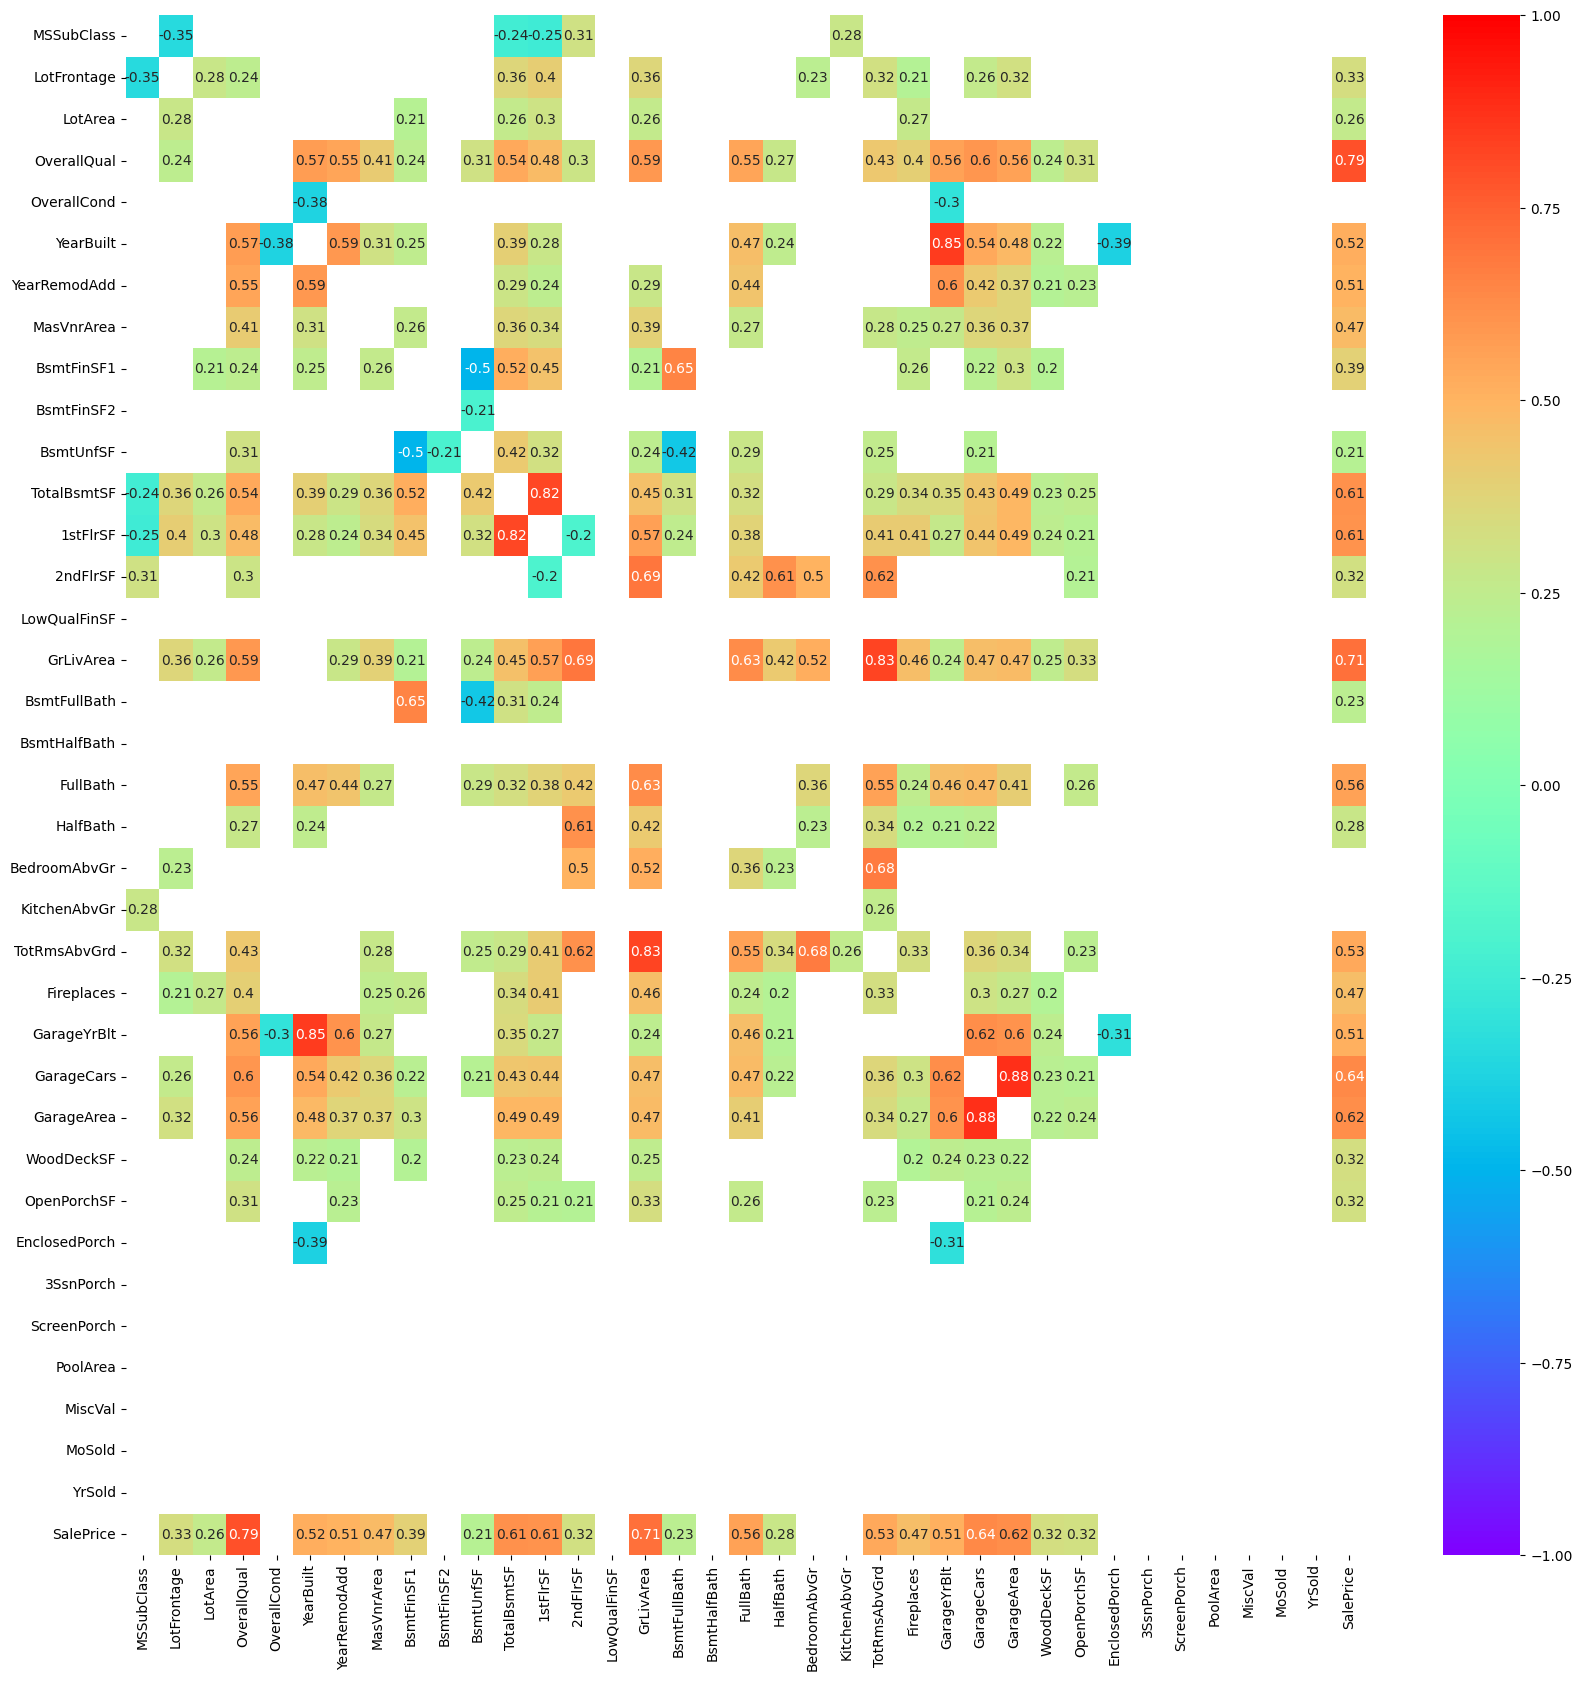

In [22]:
plt.figure(figsize = (20, 20))
plt.show(sns.heatmap(dataset_corr_filtered, vmin = -1, vmax = +1, annot = True, cmap = 'rainbow'))

At first glance, some values seem to have a high correlation with the sale price of a house:
- OverallQual has a 0.79 correlation with SalePrice
- GrLivArea has a 0.71 correlation with SalePrice
- GarageCars has a 0.64 correlation with SalePrice

And so on.

Also, some seem to have almost no positive or negative correlation on the price of a house : all those values where skipped because we requested for our correlations to be superior to 0.20 or inferior to -0.20. So all the columns that were not included in the correlation matrix could be considered to have a limited or no positive or negative impact on the price of a house.

### Correlation heatmap

We will have a look at a correlation heatmap linked to the "SalePrice" column in order to look at which column might have a positive or negative correlation on the price of a house.

In [23]:
dataset_corr_saleprice = dataset.corr()[["SalePrice"]]
dataset_corr_saleprice.head(15)

/var/folders/16/l4xgjhw90qsftr1ws3c4f9zh0000gn/T/ipykernel_3778/453264663.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr_saleprice = dataset.corr()[["SalePrice"]]


,SalePrice
MSSubClass,-0.084284
LotFrontage,0.329220
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.472614
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378


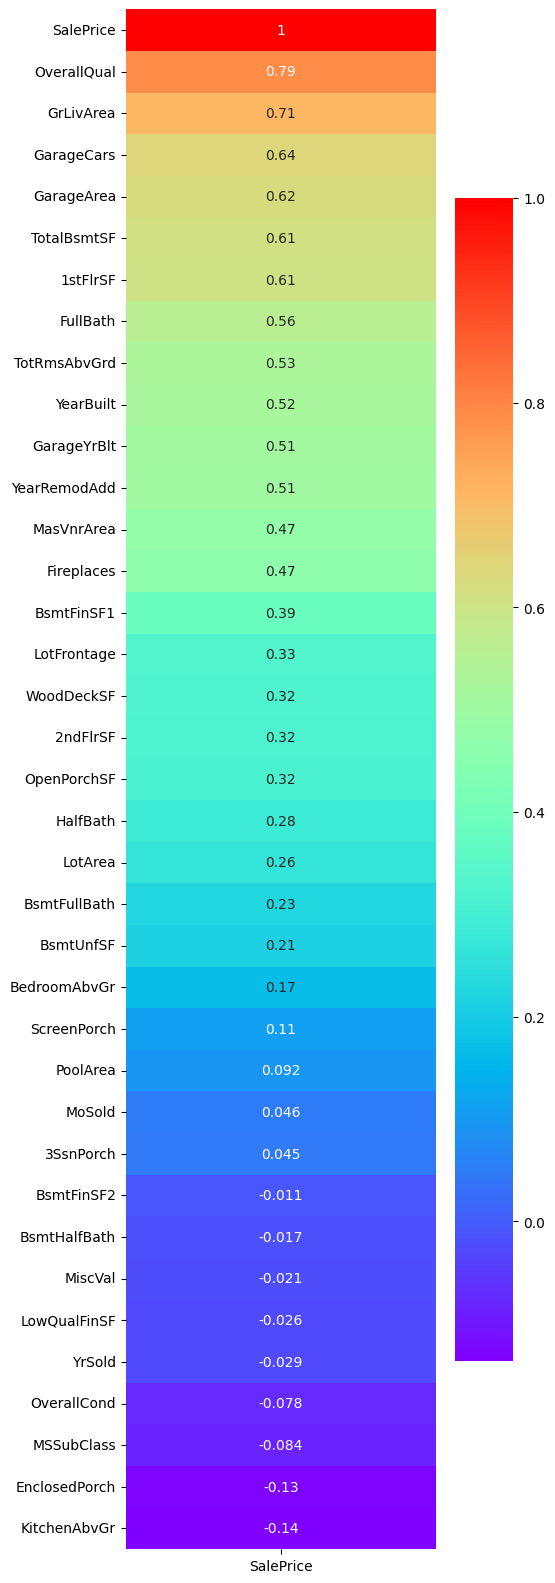

In [24]:
plt.figure(figsize=(5,20))
plt.show(sns.heatmap(dataset_corr_saleprice.sort_values(by=["SalePrice"], ascending=False), cmap="rainbow", annot=True))

The values are similar between the correlation matrix and the heatmap which is logical.

We can consider the columns above 0.40 to have an impact on the sales price of a house. These columns are :
- OverallQal for the overall quality of the house
- GrLivArea for the above ground living area measured in square feet
- GarageCars for the size of the garage measured in car capacity
- GarageArea for the size of the garage measured in square feet
- FullBath for the number of bathrooms above ground
- TotalBsmtSF for the total square feet of the basement area
- 1stFlrSF for the size of the first floor measured in square feet
- TotRmsAbvGrd for the total number of rooms above ground (excluding bathrooms)
- YearBuilt for the year in which the house was built
- YearRemodAdd for remodel date
- MasVnrArea for the masonry veneer area in square feet
- Fireplaces for the number of fireplaces in the house

We could also consider columns below -0.40 to have an impact on the sales price of a house. However, none score below -0.40.

A few notes:
- GarageCars and GarageArea are pretty similar, they represent the size of the garage but are simply measured differently : one is measured with square feet, the other is measured with the number of cars that could fit in the garage.
- Most of these represent sizes in square feet which could mean that the size does count ! - already facepalming myself.
- All of the columns used have numerical data, categorical data was not included in these correlations.

#### Transforming categorical data

Now, to be a bit more thorough, we will transform categorical data in order to add them to our correlation matrix and correlation heatmap. Otherwise, we could be missing out on values that actually have an impact on the sales price.

In [35]:
# Setting the encoder to OrdinalEncoder
encoder = OrdinalEncoder(dtype = np.int64)

# Selecting categorical columns
categorical_features = make_column_selector(dtype_exclude=np.number)

# New dataframe built upon a copy of the previous dataframe
dataset_encoded = dataset.copy()

# Transforming categorical data with the encoder, i.e. encoding data.
dataset_encoded.loc[:, categorical_features] = encoder.fit_transform(dataset_encoded.loc[:, categorical_features])

# Getting only the correlation data into the dataframe
dataset_corr_encoded = dataset_encoded.corr()

# Putting filtered data into a new dataframe to keep only the ones higher than 0.20 and lower than -0.20
dataset_corr_encoded_filtered = dataset_corr_encoded[(
    (dataset_corr_encoded >= .2) | (dataset_corr_encoded <= -.2)) & (dataset_corr_encoded !=1.000)]

# Checking if the dataframe works and contains only correlation values above the requested numbers
dataset_corr_encoded_filtered.head(10)

/var/folders/16/l4xgjhw90qsftr1ws3c4f9zh0000gn/T/ipykernel_3778/2364662720.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset_encoded.loc[:, categorical_features] = encoder.fit_transform(dataset_encoded.loc[:, categorical_features])


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,NaN,NaN,-0.349116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSZoning,NaN,NaN,NaN,NaN,NaN,-0.368086,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,-0.349116,NaN,NaN,0.281283,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.329220
LotArea,NaN,NaN,0.281283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263843
Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,NaN,-0.368086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.221102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.255580
LandContour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,NaN,NaN,NaN,NaN,NaN,NaN,0.221102,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Correlation matrix with numerical values and encoded categorical values

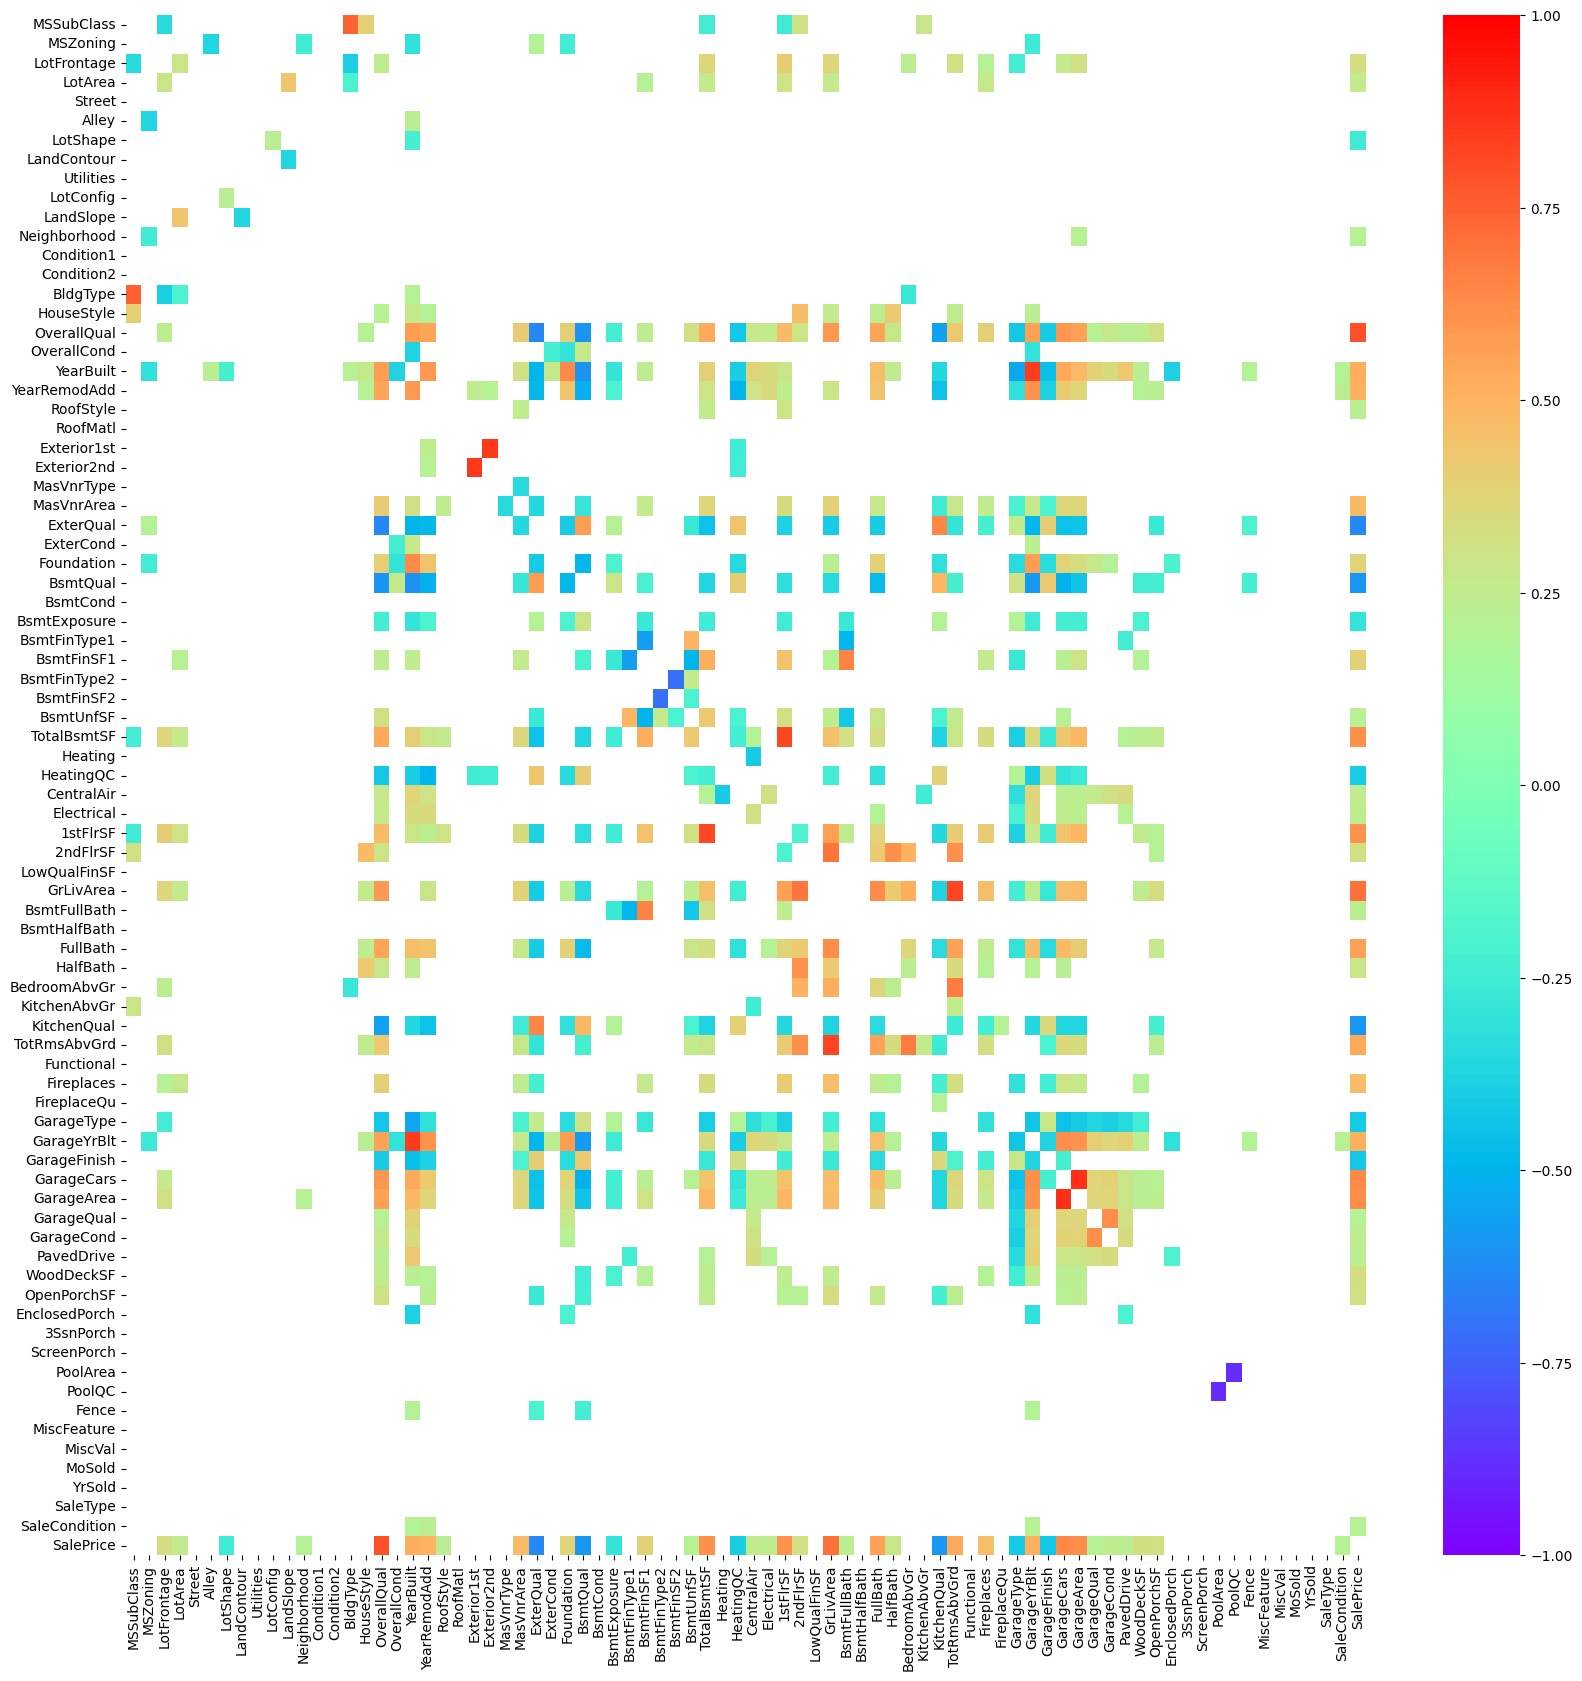

In [34]:
# Correlation matrix with filtered numerical and categorical data (after encoding)
plt.figure(figsize = (20, 20))
plt.show(sns.heatmap(dataset_corr_encoded_filtered, vmin = -1, vmax = +1, annot = False, cmap = 'rainbow'))

Due to the quantity of data still being shown in this correlation matrix, readability isn't optimal. I decided to remove the annotations that we previously shows.

So let's have a closer look at the columns which values are above to 0.40 or lower to -0.40.

In [52]:
'''Storing filtered data into a new dataframe to keep only the ones higher than 0.40 and lower than -0.40
in order to make the correlation matrix a bit more readable'''
dataset_corr_encoded_filtered_2 = dataset_corr_encoded[(
    (dataset_corr_encoded >= .4) | (dataset_corr_encoded <= -.4)) & (dataset_corr_encoded !=1.000)]

# Checking if it is correct
dataset_corr_encoded_filtered_2.head(15)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSZoning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


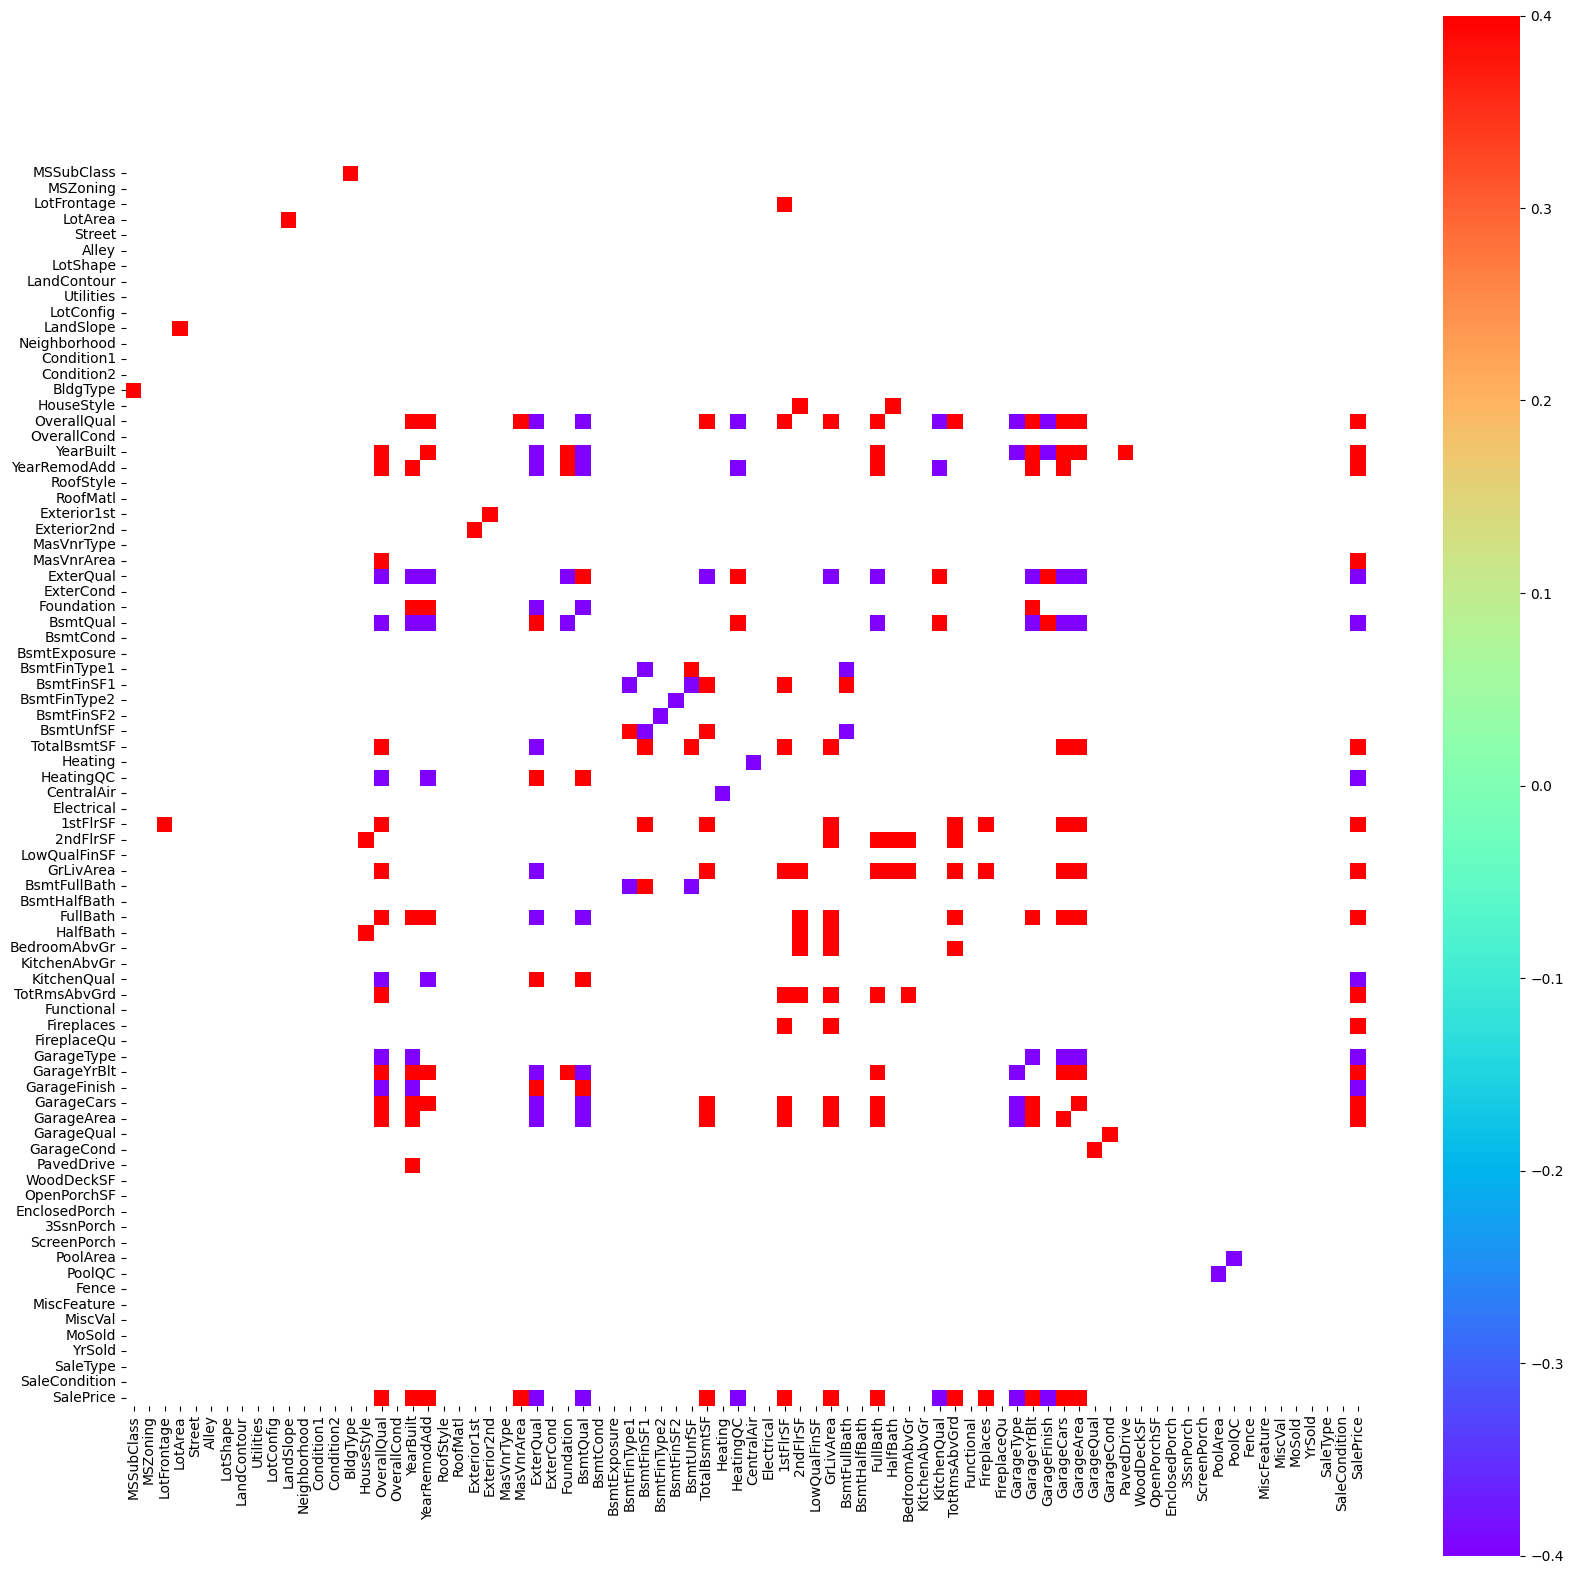

In [63]:
'''Correlation matrix with filtered numerical and categorical data (after encoding)
limited to 0.40 or above and -0.40 and below values in order to see two different groups (positive correlations and negative correlations)'''

plt.figure(figsize = (20, 20))
plt.show(sns.heatmap(dataset_corr_encoded_filtered_2, vmin = -0.4, vmax = 0.4, annot = False, cmap = 'rainbow', square=True))

Now, let's have a closer look at the correlation heatmap in order to have a better readability of these correlations.

### Correlation heatmap with numerical values and encoded categorical values

In [38]:
# Creating a dataframe with correlation values for the column "SalePrice"
dataset_corr_full_saleprice = dataset_encoded.corr()[["SalePrice"]]
dataset_corr_full_saleprice.head(15)

,SalePrice
MSSubClass,-0.084284
MSZoning,-0.166872
LotFrontage,0.329220
LotArea,0.263843
Street,0.041036
Alley,0.083121
LotShape,-0.255580
LandContour,0.015453
Utilities,-0.014314
LotConfig,-0.067396


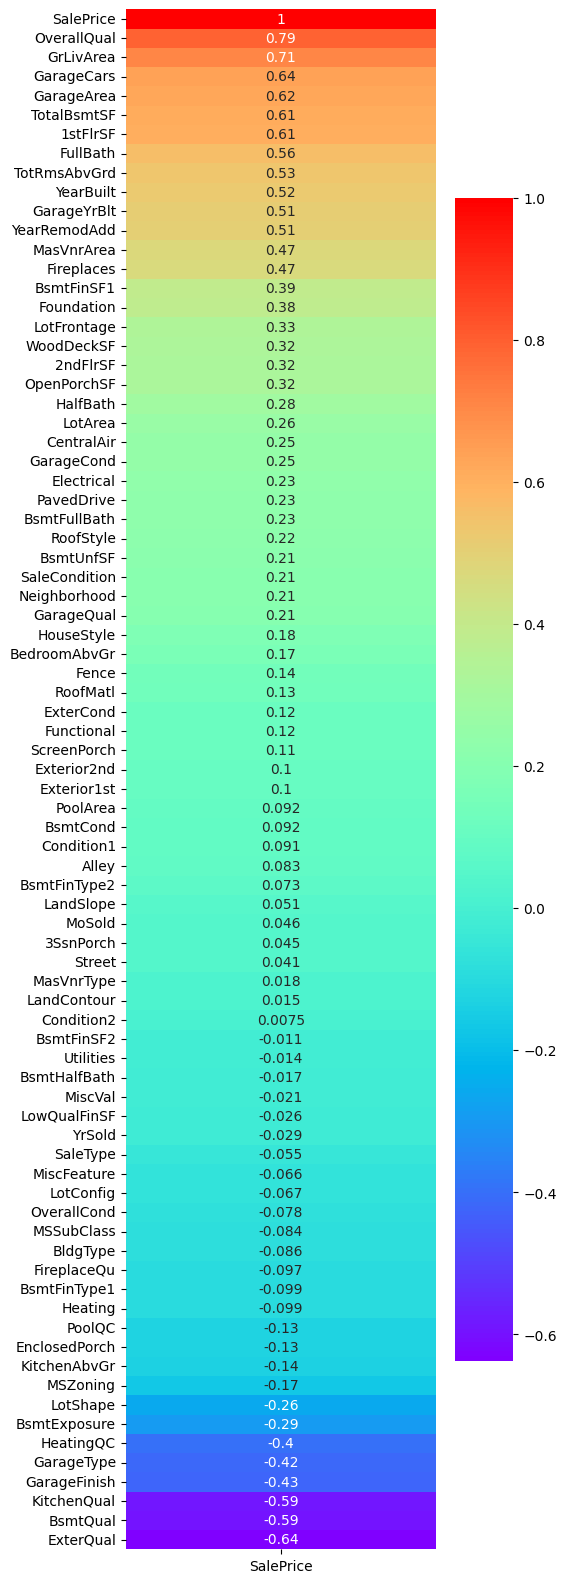

In [64]:
plt.figure(figsize=(5,20))
plt.show(sns.heatmap(dataset_corr_full_saleprice.sort_values(by=["SalePrice"], ascending=False), cmap="rainbow", annot=True))

A few notes :
- The above 0.40 ranking did not change.
- The below or equal to -0.40 ranking did change : some of our categorical data is shown as having a correlation on the sales price of the house.

The columns that are below or equal to -0.40 are, starting from the lowest of all :
- ExterQual for the quality of the material on the exterior of the house
- BsmtQual for the evaluation of the height of the basement
- KitchenQual for the evaluation of the kitchen quality
- GarageFinish for the quality of the interior finish of the garage
- GarageType for the type of the garage and its location compared to the house
- HeatingQC for the heating quality and condition

These columns seem to be linked to quality and the evaluation of quality for certain aspects of a house. I wonder if we could link these elements to the column "OverallQual" (for overall quality) which sits at the top of the correlation heatmap.

### Correlation with the overall quality of a house

In [47]:
dataset_corr_full_overallqual = dataset_encoded.corr()[["OverallQual"]]
dataset_corr_full_overallqual.head(15)

,OverallQual
MSSubClass,0.032628
MSZoning,-0.160099
LotFrontage,0.236891
LotArea,0.105806
Street,0.058823
Alley,0.116905
LotShape,-0.190497
LandContour,0.028907
Utilities,-0.001881
LotConfig,-0.031086


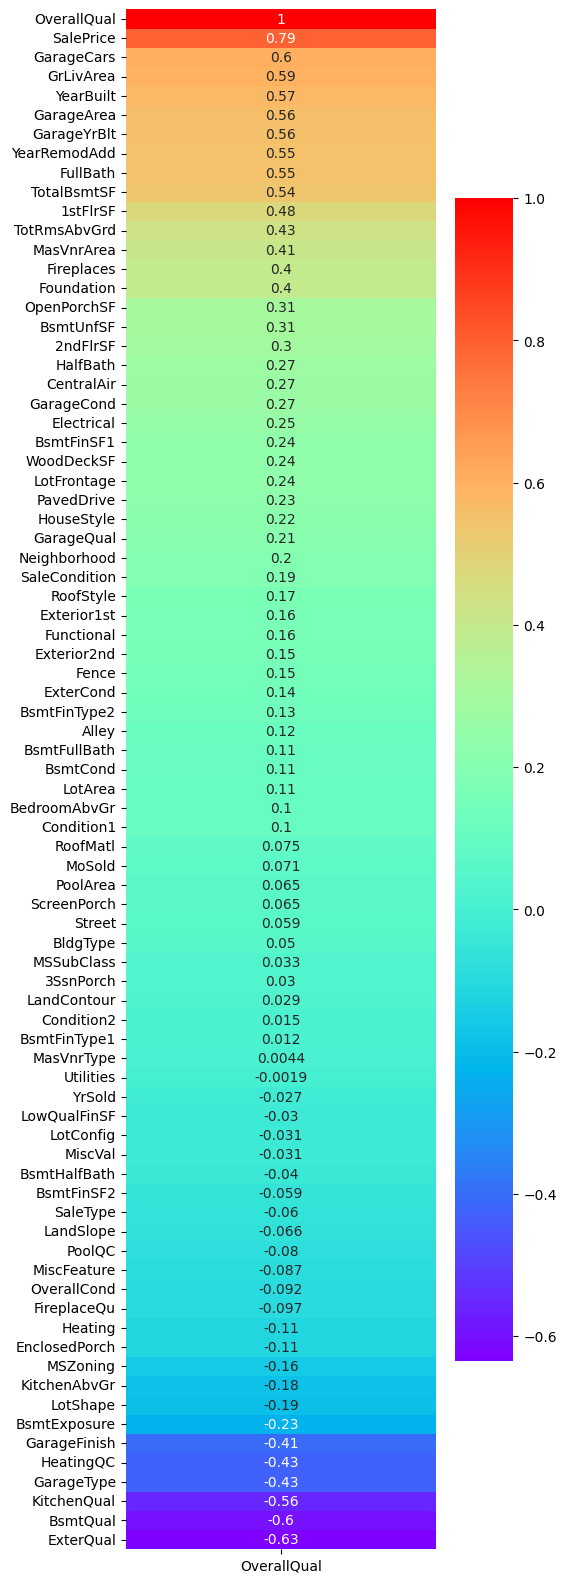

In [48]:
plt.figure(figsize=(5,20))
plt.show(sns.heatmap(dataset_corr_full_overallqual.sort_values(by=["OverallQual"], ascending=False), cmap="rainbow", annot=True))

This seems to confirm that there is a correlation between the column for overall quality and the columns "ExterQual", "BsmtQual", "KitchenQual", "GarageType", "HeatingQC" and "GarageFinish".

### Grouping data in categories for visualization

It may be interesting to put some columns in similar categories. For example, columns "GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond" could all be put in a category labeled "Garage".

We'll explore that possibility and have a closer look at the data after making these categories.

In [27]:
dataset_interior = dataset.loc[:, ["Pclass", "Sex", "Age_label", "Age_Sex", "Survived"]]
dataset_interior

KeyError: "None of [Index(['Pclass', 'Sex', 'Age_label', 'Age_Sex', 'Survived'], dtype='object')] are in the [columns]"

In [ ]:
dataset_exterior = dataset.loc[:, ["Pclass", "Sex", "Age_label", "Age_Sex", "Survived"]]
dataset_exterior

In [ ]:
dataset_garage = dataset.loc[:, ["Id", "MSSubClass", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]]
dataset_garage